## Part 1: Import Statements

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from seaborn import heatmap
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
from collections import Counter


from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## Part 2: Import processed data

In [2]:
data = pd.read_csv("Data/processed_data.csv", index_col=0)
data = data.dropna()
data


,tweet,class
0,woman shouldnt complain cleaning house man alw...,2
1,boy dats coldtyga dwn bad cuffin dat hoe place,1
2,dawg ever fuck bitch stato cry confused shit,1
3,look like tranny,1
4,shit hear might true might faker bitch told ya,1
...,...,...
25291,yous muthafin lie right tl trash mine bible sc...,1
25292,youve gone broke wrong heababy drove redneck c...,2
25294,young buck wan na eat dat nigguh like aint fuc...,1
25295,youu got wild bitches tellin lies,1


## Part 3: Splitting data 

Splitting data 

In [3]:

#splitting the data into train, validation, test
X, X_test, y, y_test = train_test_split(data['tweet'], data['class'],  test_size=0.2,random_state=42)


In [4]:
#splitting the data into train and validation
X_train, X_cv, y_train, y_cv = train_test_split(X,y,test_size = 0.25,train_size =0.75, stratify=y,random_state=42)
X_train.shape

(14319,)

In [121]:
X_train.sample(5)

9394     floyd please deliver temptation oh wish bitch ...
19881                   life shoto salty get u pussy happy
4272                                           working fag
14583    theres nothing hotter pale albino chick play g...
24974                                   still got hoes tho
Name: tweet, dtype: object

## Part 4: Feature Extraction

## Count Vectorization

Word n grams: unigrams

In [5]:
#Count Vectorizing the X_train
count_vec = CountVectorizer()
count_vec.fit(X_train)

X_train_count = count_vec.transform(X_train)
X_train_count = X_train_count.toarray()

#Count Vectorizing the X_cv
X_cv_count = count_vec.transform(X_cv)
X_cv_count = X_cv_count.toarray()

#Count Vectorizing the X_test
X_test_count = count_vec.transform(X_test)
X_test_count = X_test_count.toarray()

count_vec.vocabulary_

{'punch': 10919,
 'bitch': 1303,
 'lip': 8055,
 'hahaha': 5952,
 'go': 5618,
 'buy': 1950,
 'bitches': 1312,
 'waka': 15168,
 'tammy': 13777,
 'got': 5715,
 'ass': 646,
 'beat': 1066,
 'ctfu': 3183,
 'niggas': 9413,
 'dont': 3888,
 'ever': 4468,
 'back': 830,
 'face': 4595,
 'tears': 13876,
 'joy': 7370,
 'forgot': 5105,
 'youre': 15937,
 'bull': 1846,
 'said': 11857,
 'yeezus': 15860,
 'good': 5673,
 'jcole': 7225,
 'trash': 14429,
 'might': 8766,
 'one': 9762,
 'sneak': 12803,
 'dissin': 3783,
 'hoe': 6398,
 'nigga': 9404,
 'pussy': 10953,
 'nigguh': 9432,
 'name': 9208,
 'jesus': 7267,
 'daddy': 3284,
 'yellow': 15866,
 'outside': 9922,
 'like': 8004,
 'girls': 5567,
 'cant': 2062,
 'guys': 5919,
 'hit': 6368,
 'girl': 5561,
 'double': 3921,
 'standard': 13204,
 'forever': 5094,
 'exist': 4531,
 'kirk': 7593,
 'hinrich': 6349,
 'going': 5650,
 'fucking': 5274,
 'dumb': 4092,
 'adawg': 104,
 'getcho': 5499,
 'ghetto': 5518,
 'booty': 1550,
 'ta': 13717,
 'bad': 849,
 'always': 339,
 

Vocabulary of train and test set with respective counts

In [6]:
words = []
amounts = []
for key, value in count_vec.vocabulary_.items():
    words.append(key)
    amounts.append(value)

word_counts = pd.DataFrame(words, columns = ["words"])
word_counts["amounts"] = amounts

In [7]:
word_counts.sort_values(by = "amounts", ascending = False, inplace = True)

TFIDF Vectorization

In [8]:
#TFIDF Vectorizing the X_train

tfidf = TfidfVectorizer()

X_train_tf = tfidf.fit_transform(X_train)
X_train_tf = X_train_tf.toarray()

#Vectorizing the X_cv
X_cv_tf = tfidf.transform(X_cv)
X_cv_tf = X_cv_tf.toarray()

#TFIDF Vectorizing the X_test
X_test_tf = tfidf.transform(X_test)
X_test_tf = X_test_tf.toarray()


Balancing training data

In [9]:
def oversample(X_train_vectorized, y_train):
    print("Before Oversampling: {}".format(Counter(y_train)))

    # # define oversampling strategy
    oversample = RandomOverSampler(sampling_strategy='all')

    # # fit and apply the transform
    X_train_over, y_train_over = oversample.fit_resample(X_train_vectorized, y_train)
    print("After Oversampling: {}".format(Counter(y_train_over)))
    
    return X_train_over, y_train_over

## Oversampling

Oversampling CountVectorized training data

In [10]:
X_train_over_count, y_train_over_count = oversample(X_train_count, y_train)

Before Oversampling: Counter({1: 11049, 2: 2453, 0: 817})
After Oversampling: Counter({1: 11049, 2: 11049, 0: 11049})


Oversampling TFIDF-Vectorized  training data

In [11]:
X_train_over_tf, y_train_over_tf = oversample(X_train_tf, y_train)

Before Oversampling: Counter({1: 11049, 2: 2453, 0: 817})
After Oversampling: Counter({1: 11049, 2: 11049, 0: 11049})


## Models

In [12]:
def printModelStats(y_preds, y_test):
    print(classification_report(y_test, y_preds, target_names = ['Hate', 'Offensive', 'Neither']))
    
    cm = confusion_matrix(y_preds, y_test)
    print("The confusion matrix:")
    print(cm)
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] 
    sns.heatmap((cm_percent), annot = True, cmap = "Blues").set(title ="Confusion Matrix Expressed in %")

## LinearSVC

## Count Vectorization

Linear SVC and data with CountVectorizations

In [13]:
# Initalising model
svc = LinearSVC(random_state= 424, max_iter = 20000)

# Train and predict
svc.fit(X_train_over_count, y_train_over_count)
y_preds = svc.predict(X_cv_count)


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


              precision    recall  f1-score   support

        Hate       0.27      0.42      0.33       272
   Offensive       0.93      0.89      0.91      3683
     Neither       0.80      0.80      0.80       818

    accuracy                           0.85      4773
   macro avg       0.66      0.70      0.68      4773
weighted avg       0.87      0.85      0.86      4773

The confusion matrix:
[[ 115  278   36]
 [ 128 3270  129]
 [  29  135  653]]


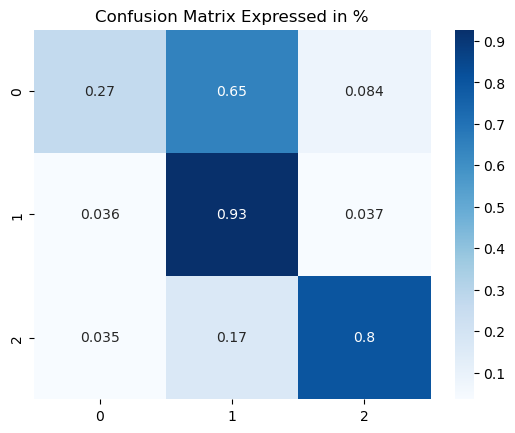

In [14]:
# output statistics
printModelStats(y_preds, y_cv)

Gridsearch for optimization

In [102]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'loss': ['hinge', 'squared_hinge'],
    'dual': ["auto"],
    # 'tol': [1e-4, 1e-5],
    'C': [1, 10],
    'multi_class': ['ovr', 'crammer_singer'],
    'fit_intercept': [True, False],
    'intercept_scaling': [1, 1.5 ,2],
    'class_weight': [None, 'balanced']
}

svc = LinearSVC(random_state= 424, max_iter = 20000)

grid_search_svc_count = GridSearchCV(svc, param_grid, refit=True,verbose = 3, cv = 5)


grid_search_svc_count.fit(X_train_over_count, y_train_over_count)
grid_search_svc_count.best_params_
    
# best_params_:{'C': 10, 'dual': 'auto', 'loss': 'squared_hinge', 'penalty': 'l1'}

[CV 5/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.955 total time=  15.5s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.949 total time=  16.6s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.947 total time=   9.2s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.955 total time=  15.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.956 total time=  16.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.955 total time=  15.1s
[CV 1/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 2/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 3/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 4/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 5/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.949 total time=  16.1s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.947 total time=   9.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.955 total time=  13.6s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.956 total time=  15.4s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.955 total time=  13.7s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.949 total time=  16.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.947 total time=   8.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.955 total time=  13.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.956 total time=  15.4s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.955 total time=  13.8s
[CV 1/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.953 total time=  20.3s
[CV 2/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.953 total time=  19.4s
[CV 3/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.959 total time=  17.5s
[CV 4/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.957 total time=  19.0s
[CV 5/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=ov

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.949 total time=  16.1s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.947 total time=   8.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.955 total time=  13.5s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.956 total time=  15.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.955 total time=  14.2s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.949 total time=  16.5s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.947 total time=   9.5s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.955 total time=  14.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.956 total time=  16.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.955 total time=  14.4s
[CV 1/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.9s
[CV 2/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 3/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 4/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 5/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 1

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.949 total time=  15.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.947 total time=   8.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.955 total time=  13.6s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.956 total time=  15.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.955 total time=  13.6s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.949 total time=  16.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.947 total time=   8.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.955 total time=  13.6s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.956 total time=  15.4s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.955 total time=  13.8s
[CV 1/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.953 total time=  20.1s
[CV 2/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.953 total time=  18.6s
[CV 3/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.959 total time=  17.3s
[CV 4/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.957 total time=  18.9s
[CV 5/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=ovr, penalty=l

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.949 total time=  17.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.947 total time=   8.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.955 total time=  13.6s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.956 total time=  15.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.955 total time=  13.7s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.949 total time=  16.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.947 total time=   8.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.955 total time=  13.5s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.956 total time=  15.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=None, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.955 total time=  13.7s
[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.954 total time=  29.6s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.949 total time=  12.6s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.957 total time=  12.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.956 total time=  14.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.957 total time=  12.6s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.954 total time=  29.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.949 total time=  12.5s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.957 total time=  12.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.956 total time=  14.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.957 total time=  12.7s
[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.957 total time=  24.9s
[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.954 total time=  22.6s
[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.961 total time=  21.6s
[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.961 total time=  23.4s
[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_cl

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.954 total time=  29.7s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.949 total time=  12.6s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.957 total time=  12.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.956 total time=  14.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.957 total time=  12.6s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.954 total time=  29.6s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.949 total time=  12.5s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.957 total time=  12.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.956 total time=  15.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.957 total time=  12.7s
[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=ovr, penalty=l1;, score=na

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=ovr, penalty=l2;, score=0.959 total time=  19.1s
[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=ovr, penalty=l2;, score=0.957 total time=  14.7s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.954 total time=  38.5s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.949 total time=  14.1s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.957 total time=  14.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.955 total time=  18.1s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.957 total time=  16.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.954 total time=  37.5s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.949 total time=  14.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.957 total time=  14.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.955 total time=  17.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.957 total time=  16.6s
[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.957 total time=  25.9s
[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.954 total time=  22.9s
[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.962 total time=  22.8s
[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.961 total time=  25.0s
[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hin

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.954 total time=  37.4s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.949 total time=  14.1s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.957 total time=  14.2s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.955 total time=  17.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.957 total time=  16.6s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.954 total time=  37.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.949 total time=  14.1s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.957 total time=  14.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.955 total time=  17.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.957 total time=  16.6s
[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.6s
[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total 

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.954 total time=  50.6s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.949 total time=  17.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.957 total time=  17.7s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.955 total time=  36.2s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.957 total time=  22.4s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.954 total time=  50.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.949 total time=  18.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.957 total time=  17.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.955 total time=  35.4s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.957 total time=  21.5s
[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.958 total time=  25.7s
[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.953 total time=  22.4s
[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.960 total time=  22.3s
[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.960 total time=  24.7s
[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_cl

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.954 total time=  50.7s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.949 total time=  18.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.957 total time=  17.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.955 total time=  35.4s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.957 total time=  22.4s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.954 total time=  51.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.949 total time=  17.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.957 total time=  17.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.955 total time=  35.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=True, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.957 total time=  21.6s
[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=ovr, penalty=l1;, score=nan tot

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.949 total time=  16.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.947 total time=   9.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.955 total time=  14.2s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.956 total time=  14.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.955 total time=  10.6s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.949 total time=  16.2s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.947 total time=   9.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.955 total time=  14.2s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.956 total time=  15.1s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.955 total time=  11.5s
[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.953 total time=  20.1s
[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.953 total time=  18.5s
[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.959 total time=  17.3s
[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.958 total time=  18.2s
[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, mu

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.949 total time=  16.1s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.947 total time=   8.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.955 total time=  14.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.956 total time=  13.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.955 total time=  10.5s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.949 total time=  16.2s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.947 total time=   9.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.955 total time=  14.2s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.956 total time=  14.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.955 total time=  10.5s
[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=ovr, penalty=l1;, sc

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.949 total time=  16.1s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.947 total time=   9.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.955 total time=  14.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.956 total time=  13.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.955 total time=  10.5s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.949 total time=  16.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.947 total time=   8.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.955 total time=  14.2s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.956 total time=  13.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.955 total time=  10.5s
[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.953 total time=  20.0s
[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.953 total time=  18.5s
[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.959 total time=  17.4s
[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.958 total time=  18.3s
[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squar

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.949 total time=  16.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.947 total time=   8.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.955 total time=  14.2s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.956 total time=  13.7s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.955 total time=  10.4s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.949 total time=  16.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.947 total time=   8.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.955 total time=  14.2s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.956 total time=  13.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=1.5, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.955 total time=  10.4s
[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l1;, score=nan total time=   1.7s
[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l1;, score=nan 

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.949 total time=  16.1s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.947 total time=   8.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.955 total time=  14.2s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.956 total time=  13.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l1;, score=0.955 total time=  10.5s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.949 total time=  16.1s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.947 total time=   9.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.955 total time=  14.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.956 total time=  13.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=hinge, multi_class=crammer_singer, penalty=l2;, score=0.955 total time=  10.5s
[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.953 total time=  20.1s
[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.953 total time=  18.4s
[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.959 total time=  17.4s
[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=ovr, penalty=l1;, score=0.958 total time=  18.3s
[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, mu

C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.949 total time=  15.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.947 total time=   8.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.955 total time=  14.1s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.956 total time=  14.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l1;, score=0.955 total time=  10.5s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.949 total time=  16.0s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.947 total time=   8.9s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.955 total time=  14.3s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.956 total time=  13.8s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=10, class_weight=balanced, dual=auto, fit_intercept=False, intercept_scaling=2, loss=squared_hinge, multi_class=crammer_singer, penalty=l2;, score=0.955 total time=  10.5s


C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
120 fits failed out of a total of 960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\never\AppData\Roaming\Python\Python311\sit

{'C': 10,
 'class_weight': None,
 'dual': 'auto',
 'fit_intercept': True,
 'intercept_scaling': 2,
 'loss': 'squared_hinge',
 'multi_class': 'ovr',
 'penalty': 'l1'}

              precision    recall  f1-score   support

        Hate       0.21      0.34      0.26       272
   Offensive       0.91      0.89      0.90      3683
     Neither       0.81      0.73      0.77       818

    accuracy                           0.83      4773
   macro avg       0.64      0.65      0.64      4773
weighted avg       0.85      0.83      0.84      4773

The confusion matrix:
[[  92  305   39]
 [ 155 3266  182]
 [  25  112  597]]


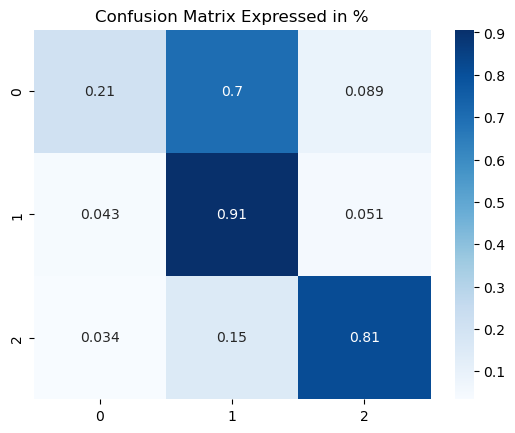

In [103]:
y_preds = grid_search_svc_count.predict(X_cv_count)
printModelStats(y_preds, y_cv)

SVM Model with best parameters for Count Vectorizations

In [15]:
# Initalising model

svc = LinearSVC(random_state= 424, C=10, penalty= 'l1', max_iter= 20000, dual = "auto", loss = "squared_hinge", fit_intercept= True, intercept_scaling= 2, class_weight= None, multi_class= "ovr")

# Train and predict
svc.fit(X_train_over_count, y_train_over_count)
y_preds = svc.predict(X_cv_count)


              precision    recall  f1-score   support

        Hate       0.21      0.35      0.26       272
   Offensive       0.91      0.89      0.90      3683
     Neither       0.81      0.74      0.77       818

    accuracy                           0.83      4773
   macro avg       0.65      0.66      0.65      4773
weighted avg       0.85      0.83      0.84      4773

The confusion matrix:
[[  94  306   38]
 [ 151 3267  178]
 [  27  110  602]]


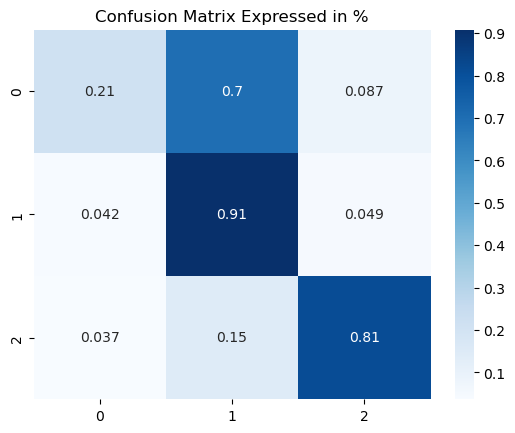

In [16]:
# output statistics
printModelStats(y_preds, y_cv)

## TFIDF

Linear SVC and data with TFIDF Vectorizations

In [17]:
# Initalising model
svc = LinearSVC(random_state = 424, max_iter = 20000)

# Train and predict
svc.fit(X_train_over_tf, y_train_over_tf)
y_preds = svc.predict(X_cv_tf)



C:\Users\never\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


              precision    recall  f1-score   support

        Hate       0.29      0.47      0.36       272
   Offensive       0.94      0.89      0.91      3683
     Neither       0.79      0.83      0.81       818

    accuracy                           0.85      4773
   macro avg       0.67      0.73      0.69      4773
weighted avg       0.88      0.85      0.86      4773

The confusion matrix:
[[ 127  272   34]
 [ 115 3260  102]
 [  30  151  682]]


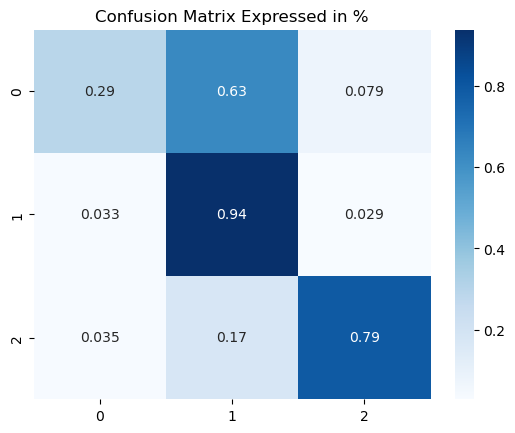

In [18]:
# output statistics
printModelStats(y_preds, y_cv)

Grid Search for SVM with TFIDF

In [ ]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'loss': ['hinge', 'squared_hinge'],
    'dual': ["auto"],
    # 'tol': [1e-4, 1e-5],
    'C': [1, 10],
    'multi_class': ['ovr', 'crammer_singer'],
    'fit_intercept': [True, False],
    'intercept_scaling': [1, 1.5 ,2],
    'class_weight': [None, 'balanced']
}

svc = LinearSVC(random_state= 424, max_iter = 20000)

grid_search_svc_tf = GridSearchCV(svc, param_grid, verbose=3,cv = 5)
grid_search_svc_tf.fit(X_train_over_tf, y_train_over_tf)
grid_search_svc_tf.best_params_

# best params:  {'C': 10, 'dual': 'auto', 'penalty': 'l1'}

In [112]:
grid_search_svc_tf.best_params_

{'C': 10,
 'class_weight': 'balanced',
 'dual': 'auto',
 'fit_intercept': True,
 'intercept_scaling': 1.5,
 'loss': 'squared_hinge',
 'multi_class': 'ovr',
 'penalty': 'l1'}

              precision    recall  f1-score   support

        Hate       0.17      0.62      0.26       272
   Offensive       0.93      0.79      0.86      3683
     Neither       0.87      0.67      0.75       818

    accuracy                           0.76      4773
   macro avg       0.66      0.69      0.62      4773
weighted avg       0.88      0.76      0.81      4773

The confusion matrix:
[[ 169  695  159]
 [  93 2918  115]
 [  10   70  544]]


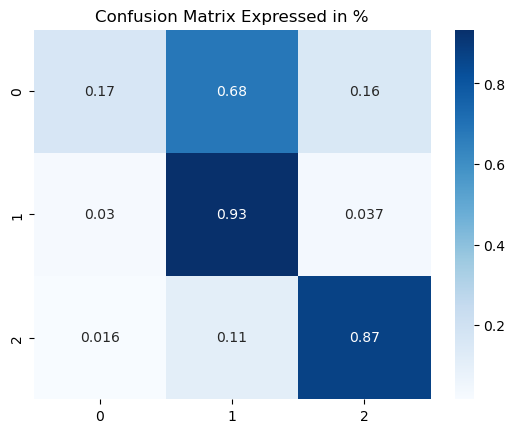

In [109]:
y_preds = grid_search_svc_tf.predict(X_cv_count)
printModelStats(y_preds, y_cv)

Optimal model

In [27]:
# Initalising model

svc = LinearSVC(random_state=424, max_iter=20000, penalty='l1', C=10, dual='auto', loss='squared_hinge', class_weight="balanced", multi_class='ovr', fit_intercept=True, intercept_scaling=1.5)
# Train and predict
svc.fit(X_train_over_tf, y_train_over_tf)
y_preds = svc.predict(X_cv_tf)



              precision    recall  f1-score   support

        Hate       0.23      0.31      0.27       272
   Offensive       0.91      0.90      0.91      3683
     Neither       0.82      0.75      0.78       818

    accuracy                           0.84      4773
   macro avg       0.65      0.65      0.65      4773
weighted avg       0.85      0.84      0.85      4773

The confusion matrix:
[[  84  244   32]
 [ 164 3324  171]
 [  24  115  615]]


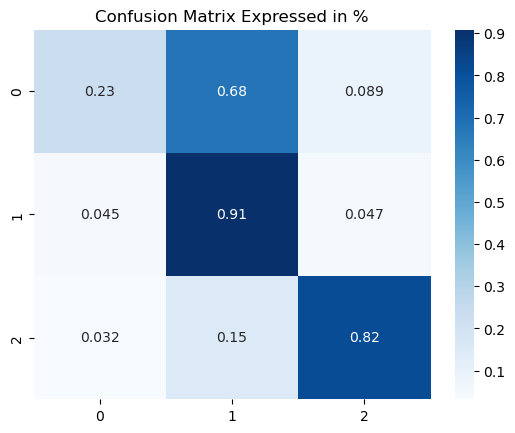

In [28]:
# output statistics
printModelStats(y_preds, y_cv)